# EE232E - Graphs and Network Flows Homework-1

## Load Packages and Settings

In [26]:
library(igraph)
library(repr)

options(repr.plot.width=4, repr.plot.height=4)
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan") 

# 1. Create random networks

## Part a:
Create three undirected random networks with 1000 nodes,
and the probability p for drawing an edge between two arbitrary
vertices 0.01, 0.05 and 0.1 respectively. Plot the degree
distributions.

In [2]:
g1 <- erdos.renyi.game(1000, 0.01)
hist(
    degree(g1, mode="all"), 
    col=colors,
    main="Degree distribution for p=0.01",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

ERROR: Error in eval(expr, envir, enclos): could not find function "erdos.renyi.game"


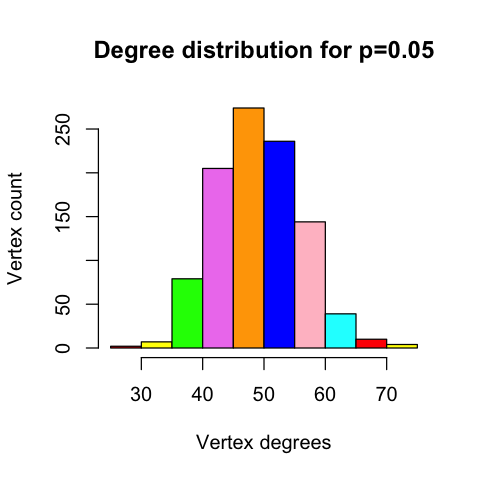

In [28]:
g2 <- erdos.renyi.game(1000, 0.05)
hist(
    degree(g2, mode="all"), 
    col=colors,
    main="Degree distribution for p=0.05",
    xlab="Vertex degrees",
    ylab="Vertex count"
)



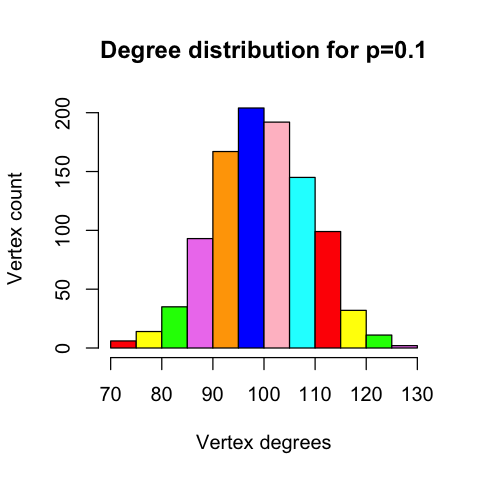

In [29]:
g3 <- erdos.renyi.game(1000, 0.1)
hist(
    degree(g3, mode="all"), 
    col=colors,
    main="Degree distribution for p=0.1",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

## Part b
Are these networks connected or disconnected? What are the
diameters of these networks?

In [30]:
# Check graph 1's connectivity and diameter
cat("Graph 1 is connected: ", is_connected(g1), "\n")
cat("Graph 1's diameter is ", diameter(g1), "\n")

Graph 1 is connected:  TRUE 
Graph 1's diameter is  5 


In [31]:
# Check graph 2's connectivity and diameter
cat("Graph 2 is connected: ", is_connected(g2), "\n")
cat("Graph 2's diameter is ", diameter(g2), "\n")

Graph 2 is connected:  TRUE 
Graph 2's diameter is  3 


In [32]:
# Check graph 1's connectivity and diameter
cat("Graph 3 is connected: ", is_connected(g3), "\n")
cat("Graph 3's diameter is ", diameter(g3), "\n")

Graph 3 is connected:  TRUE 
Graph 3's diameter is  3 


## Part c

In [33]:
probs = NULL

for (num_trials in 1 : 100) {
    for (prob in seq(from=0, to=1, by=0.001)) {
        g <- erdos.renyi.game(1000, prob)
        if(is_connected(g)) {
            break;
        }
    }
    
    probs = append(probs, prob)
}

cat("Therefore, the minimum probability for the graph to be connected is ", median(probs), "\n")

Therefore, the minimum probability for the graph to be connected is  0.008 


## Part d

We know that the sharp threshold for the connectivity of a random graph of n vertexes is $$\frac{ln(n)}{n}$$

In [34]:
log(1000)/1000

[1] 0.006907755

As we can see, the sharp threshold is quite close to the emperical value we calculated.

# 2: Fat tailed distribution

## Part a
 Create an undirected network with 1000 nodes, whose degree
distribution is proportional to $x^{−3}$. Plot the degree distribution. What is the diameter?

In [35]:
# Function to sample from the x^-3 distribution
s = 999 ** 2
sprime = (s - 1) / s

getDist = function(nv) {
    ds = c()
    for(u in runif(nv)) {
        ds = c(ds, floor(sqrt(1 / (1 - sprime * u))))
    }
    
    ds
}

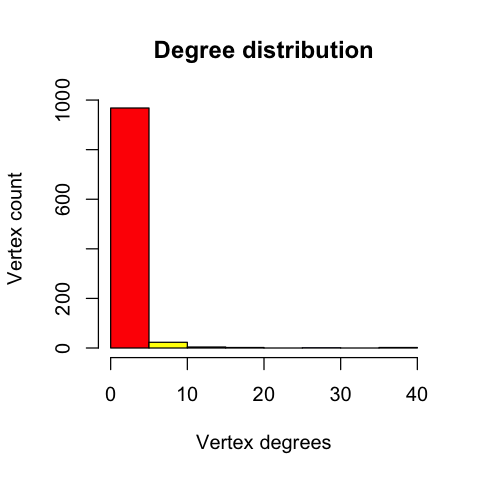

In [36]:
ds = getDist(1000)
while(sum(ds) %% 2 != 0){
    ds = getDist(1000)
}

g = sample_degseq(ds, method="simple.no.multiple")
hist(
    degree(g, mode="all"), 
    col=colors,
    main="Degree distribution",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

In [37]:
cat("The diameter of the generated graph is", diameter(g), "\n")

The diameter of the generated graph is 13 


## Part b
Is the network connected? Find the giant connected component
(GCC) and use fast greedy method to find the community
structure. Measure the modularity. Why is the modularity
so large?

The generated graph is connected: FALSE 
The generated graph has 213 components

The size of the largest connected component is 64

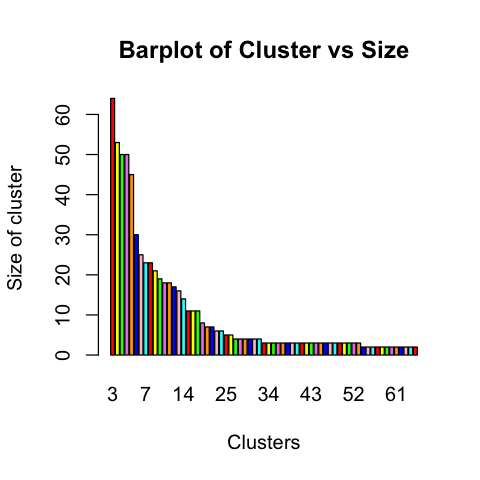

In [38]:
cat("The generated graph is connected:", is_connected(g), "\n")
cat("The generated graph has", count_components(g), "components\n\n")

cluster_ids = sort(table(membership(fastgreedy.community(g))), decreasing=TRUE)
cat("The size of the largest connected component is", cluster_ids[1])

barplot(
    cluster_ids[1:65],
    main = "Barplot of Cluster vs Size",
    xlab = "Clusters",
    ylab = "Size of cluster",
    col = colors
)

In [39]:
m = modularity(g, membership(fastgreedy.community(g)))
cat("The modularity of the given network is", m, "\n")

The modularity of the given network is 0.890817 


The modularity of a network measures the strenth of its division into modules or smaller groups. A graph with dense connections within modules and sparse connections outside modules will show a high modularity.

The network generated here simulates the fat tailed networks often found in nature. Such networks show high modularity, because of their intrinsic fat-tailed degree distribution. Modules are typically centered a few vertexes with high degrees, and therefore the density of nodes within modules tends to be high.

This is in stark contrast to networks generated using the Erdos-Renyii model, where the variance of degree is very low (the degree distribution is more or less uniform). The density of edges exiting modules is quite similar to the density of edges within modules.

## Part c
Try to generate a larger network with 10000 nodes whose degree distribution is proportional to x^-3. Compute the modularity. Is it the same as the smaller network’s?

In [40]:
ds = getDist(10000)
while(sum(ds) %% 2 != 0){
    ds = getDist(1000)
}

g = sample_degseq(ds, method="simple.no.multiple")
m = modularity(g, membership(fastgreedy.community(g)))
cat("The modularity of the given network is", m, "\n")

The modularity of the given network is 0.9509388 


Clearly the modularity of the larger network is higher than that of the network with 1000 vertexes. This is probably due to the fact that the graph generation technique used isn't scale free. 

## Part d
You can randomly pick a node i, and then randomly pick a neighbor j of that node. Measure and plot the degree distri- bution of nodes j that are picked with this process.

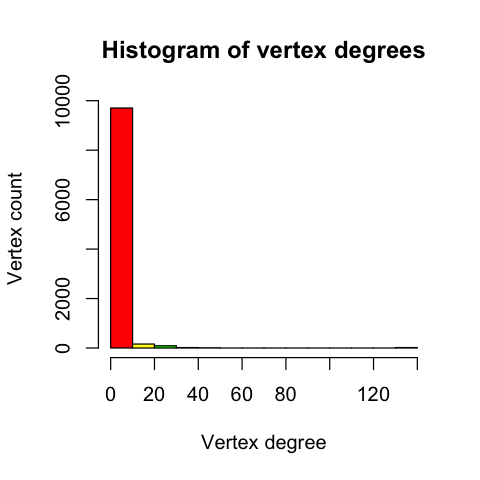

In [41]:
ds = NULL

for(i in sample(1 : vcount(g), 10000, replace=TRUE)) {
    j = sample(neighbors(g, i), 1)
    ds = append(ds, degree(g, j))
}

hist(
    ds,
    main = "Histogram of vertex degrees",
    xlab = "Vertex degree",
    ylab = "Vertex count",
    col = colors
)

# 3. Creating a  random graph by simulating its evolution

## Part a
Each time a new vertex is added it creates a number of links
to old vertices and the probability that an old vertex is cited
depends on its in-degree (preferential attachment) and age.
Produce such an undirected network with 1000 nodes. Plot
the degree distribution.

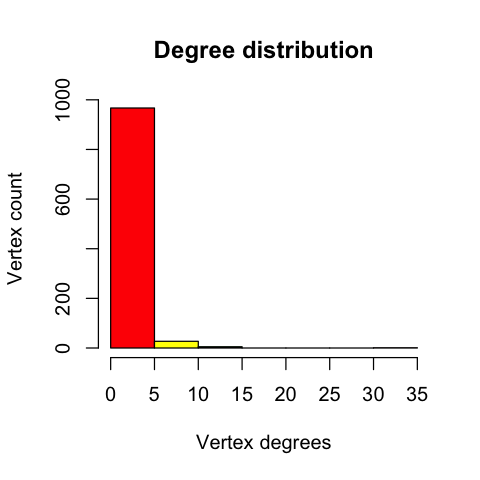

In [42]:
g = sample_pa_age(1000, 1, -1, directed=FALSE)
hist(
    degree(g, mode="all"), 
    col=colors,
    main="Degree distribution",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

## Part b
Use fast greedy method to find the community structure.
What is the modularity?

In [43]:
m = modularity(g, membership(fastgreedy.community(g)))
cat("The modularity of the given network is", m, "\n")

cat("The generated graph is connected:", is_connected(g), "\n")
cat("The generated graph has", count_components(g), "components\n\n")

The modularity of the given network is 0.9339465 
The generated graph is connected: TRUE 
The generated graph has 1 components



# 4.  Using the forest fire model to create a directed network

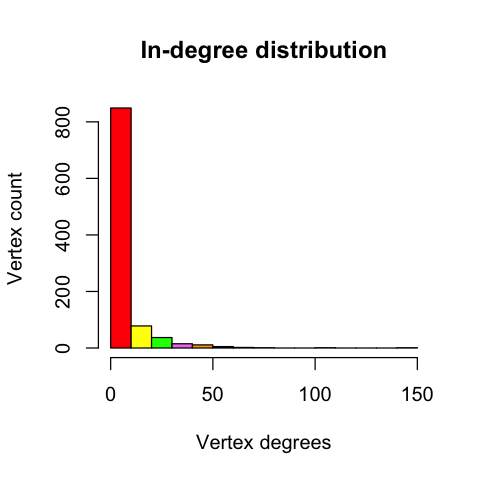

In [44]:
g = sample_forestfire(1000, fw.prob=0.37, bw.factor=0.32/0.37)
hist(
    degree(g, mode=c("in")), 
    col=colors,
    main="In-degree distribution",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

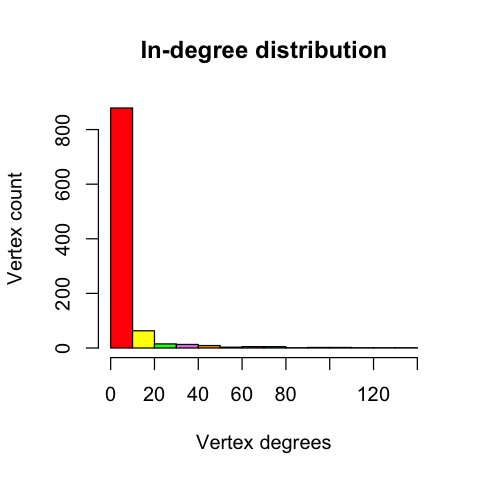

In [45]:
hist(
    degree(g, mode=c("out")), 
    col=colors,
    main="In-degree distribution",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

In [46]:
cat("The diameter of the given graph is", diameter(g), "\n")

The diameter of the given graph is 11 


In [47]:
cat("The generated graph has", count_components(g), "connected components\n")
cat("The modularity of the generated graph is", modularity(g, membership(cluster_walktrap(g))))

The generated graph has 1 connected components
The modularity of the generated graph is 0.2079406